In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [2]:
import numpy as np
import pandas as pd

In [3]:
#Read the file
seed = 7
np.random.seed(seed)
data =pd.read_csv ("forestfires (1).csv")
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [5]:
data1=data.drop(["month"],axis=1)

In [6]:
data2=data1.drop(["day"],axis=1)

In [7]:
data2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
#label encoding
from sklearn.preprocessing import LabelEncoder

In [9]:
labelencoder = LabelEncoder()
data2.iloc[:, -1] = labelencoder.fit_transform(data2.iloc[:,-1])

In [10]:
data2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
x=data2.iloc[:,0:-1]
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y=data2["size_category"]
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [15]:
#Featuring Engineering
from pandas import read_csv
from sklearn.tree import  DecisionTreeClassifier

In [16]:
model = DecisionTreeClassifier()
model.fit(x, y)

DecisionTreeClassifier()

In [17]:
print(model.feature_importances_)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [18]:
from sklearn.model_selection import train_test_split

In [20]:
#Building the model structure
model = Sequential()
model.add(Dense(12, input_dim=9, kernel_initializer='normal', activation='relu'))
model.add(Dense(8,kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

In [21]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
#building the model for different epochs
model.fit(x,y, validation_split=0.33,epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 2s 16ms/step - loss: 0.7491 - accuracy: 0.4162 - val_loss: 0.6513 - val_accuracy: 0.6784
Epoch 2/150
35/35 [==============================] - 0s 4ms/step - loss: 0.5890 - accuracy: 0.7572 - val_loss: 0.6532 - val_accuracy: 0.6784
Epoch 3/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5513 - accuracy: 0.7601 - val_loss: 0.6363 - val_accuracy: 0.6842
Epoch 4/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5359 - accuracy: 0.7601 - val_loss: 0.6175 - val_accuracy: 0.6901
Epoch 5/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5087 - accuracy: 0.7746 - val_loss: 0.5618 - val_accuracy: 0.7135
Epoch 6/150
35/35 [==============================] - 0s 4ms/step - loss: 0.4665 - accuracy: 0.7977 - val_loss: 0.5083 - val_accuracy: 0.7485
Epoch 7/150
35/35 [==============================] - 0s 4ms/step - loss: 0.4298 - accuracy: 0.8179 - val_loss: 0.4591 - val_accuracy: 0.7895
Epoch 8/150


In [23]:
#Best model
scores = model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.0358 - accuracy: 0.9826
accuracy: 98.26%


In [24]:
history=model.fit(x,y, validation_split=0.33,epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 0s 6ms/step - loss: 0.0257 - accuracy: 0.9942 - val_loss: 0.0645 - val_accuracy: 0.9708
Epoch 2/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0157 - accuracy: 0.9942 - val_loss: 0.0641 - val_accuracy: 0.9649
Epoch 3/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0183 - accuracy: 0.9942 - val_loss: 0.0728 - val_accuracy: 0.9708
Epoch 4/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0134 - accuracy: 0.9971 - val_loss: 0.0589 - val_accuracy: 0.9766
Epoch 5/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0242 - accuracy: 0.9855 - val_loss: 0.0635 - val_accuracy: 0.9766
Epoch 6/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0497 - accuracy: 0.9855 - val_loss: 0.0535 - val_accuracy: 0.9649
Epoch 7/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0279 - accuracy: 0.9884 - val_loss: 0.0824 - val_accuracy: 0.9649
Epoch 8/150
3

In [25]:
model.history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
#Plotting for train and test
import matplotlib.pyplot as plt

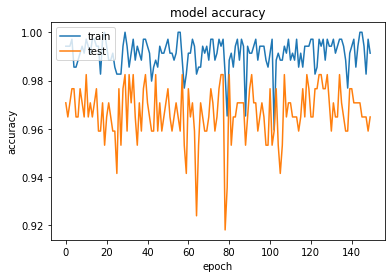

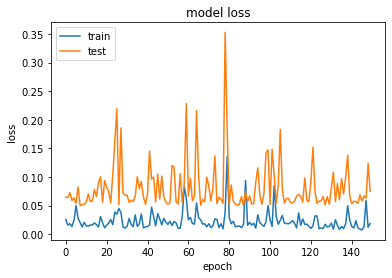

In [27]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
